In [5]:
import pandas as pd
df = pd.read_excel('data_10k.xlsx')
df

,ACC_CHET_UL_FLG,OPEN_CHET_UL_CNT,HIGH_RISK_FLG,UL_UKL_FLG,ACC_OBJ_CNT,ACC_OBJ_CNT.1,ACC_LAND_CNT,ACC_TRANS_CNT,ACC_AIR_CNT,ACC_OTHER_TRANS_CNT,...,UCHR_UCHR_REG_CHANGE_CNT,REGION_INEQ_UL_RUK_FLG,REGION_INEQ_UL_UCH_FLG,NO_OTCHET_FLG,BLOCKED_SCHET_UL_FLG,BLOCKED_SCHET_UL_CNT,SINGLE_RUK_UCH_FL_FLG,SINGLE_RUK_UCH_UL_FLG,RUK_PROVIDE_2NDFL_FLG,P_NED_ADR
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,1,0,0,2,2,0,0,0,0,...,0,0,0,0,1,48,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,0
3,1,9,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,1,0,0,0
4,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,7,0,0,0,0,0,4,0,0,...,0,1,1,0,0,0,0,0,1,0
9996,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,0,0,0,0
9997,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
9998,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Correlation Heatmap

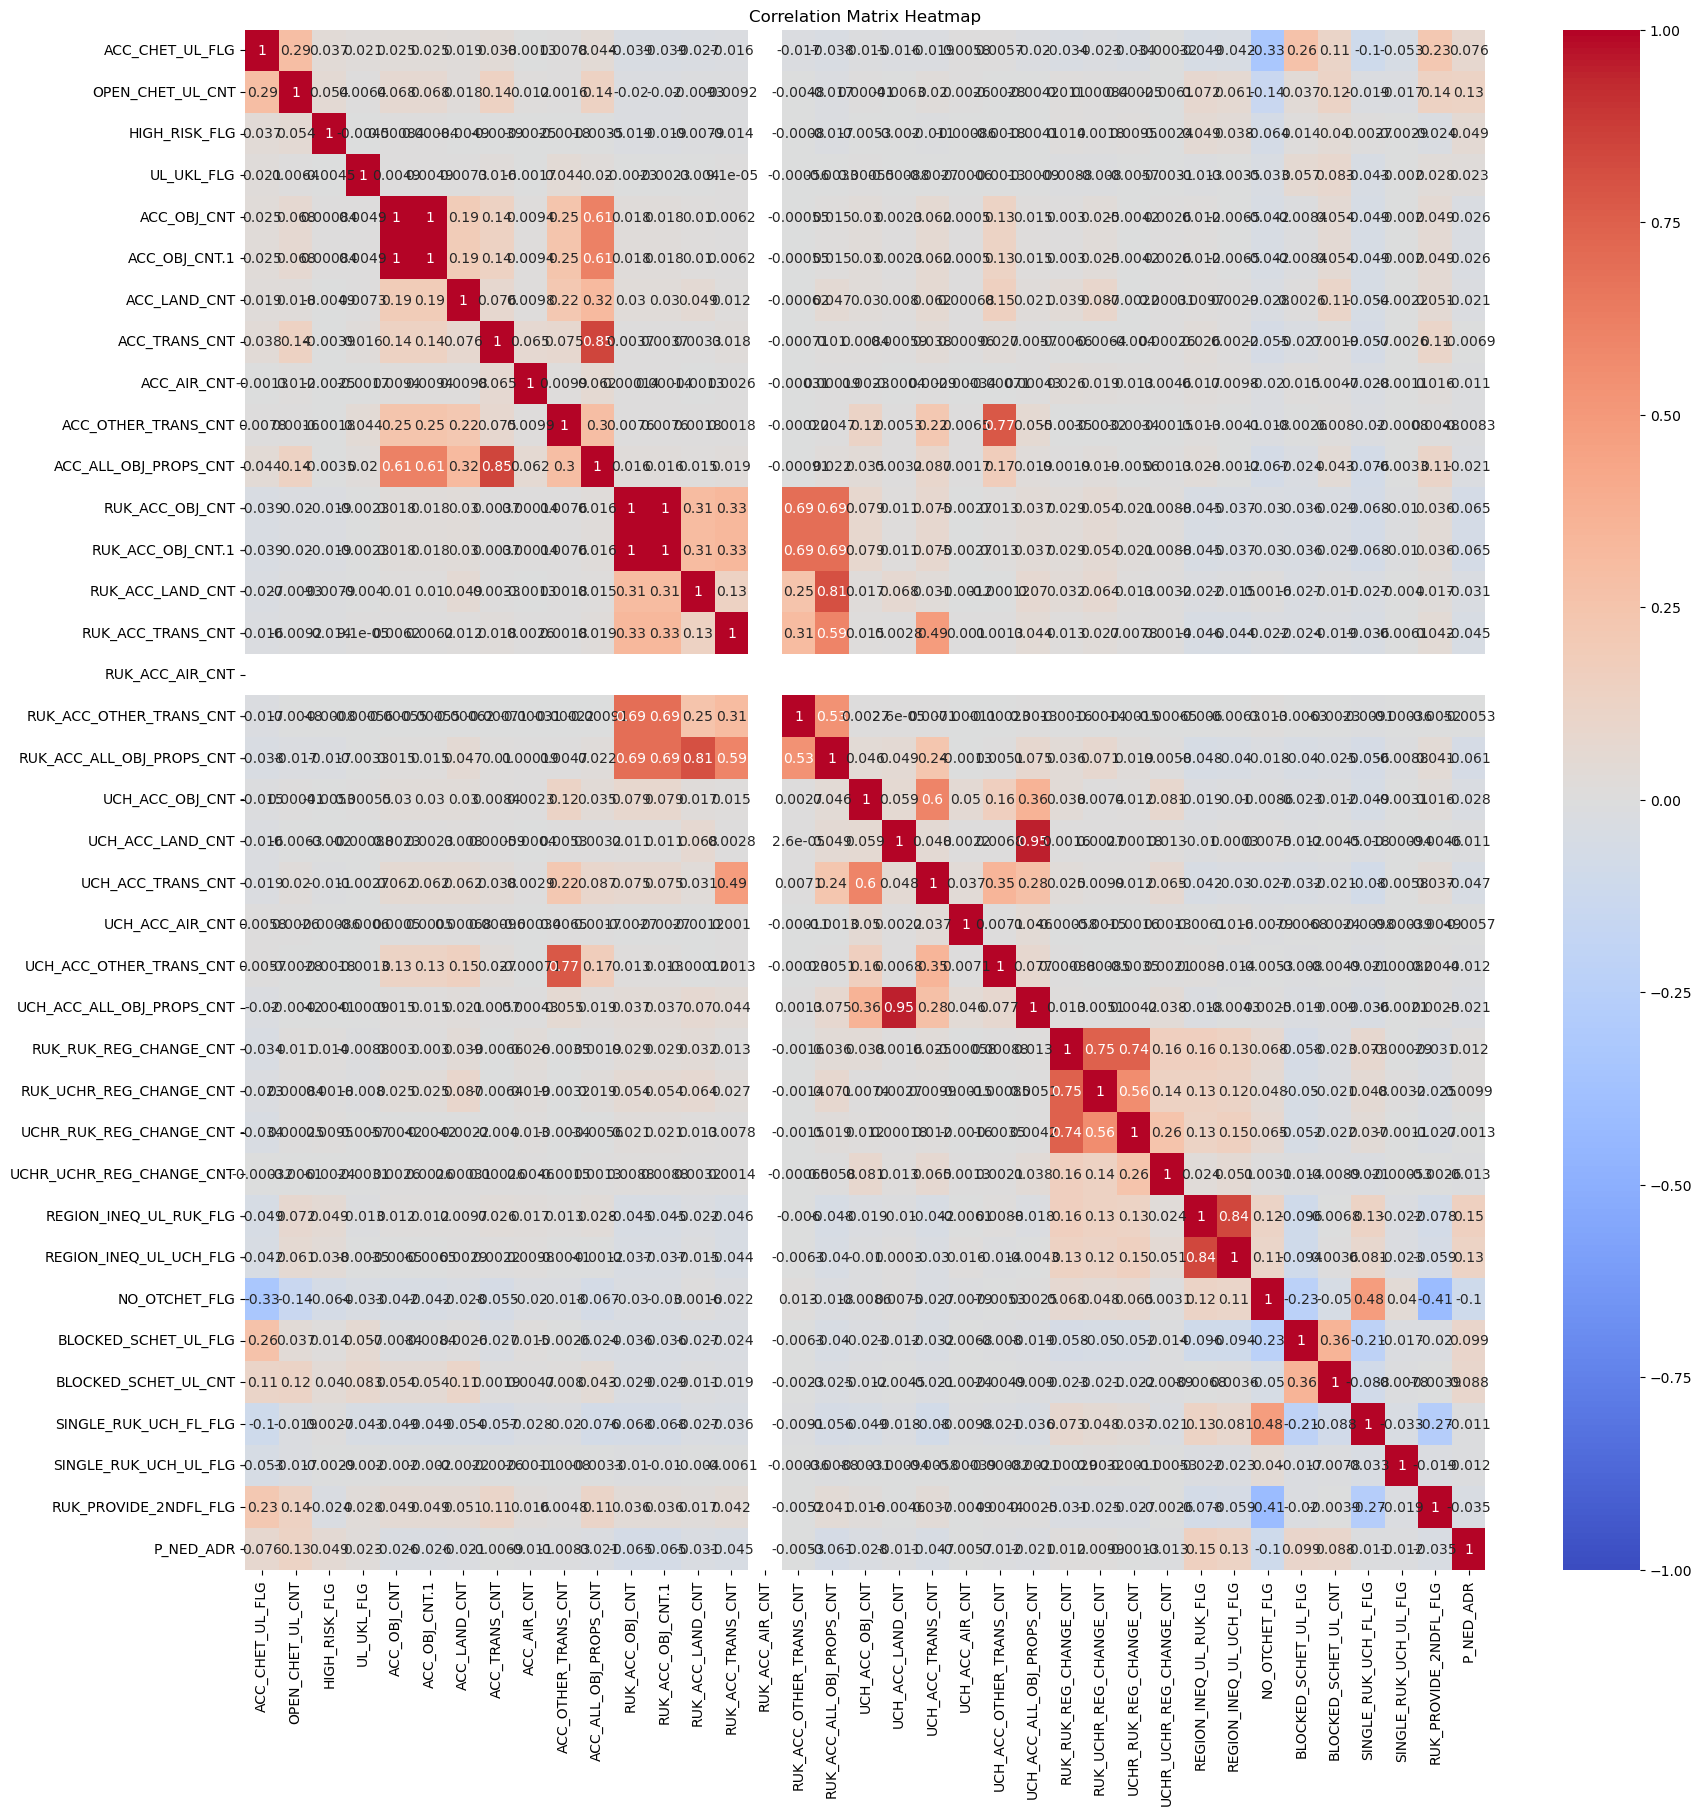

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Compute correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Distribution of target feature

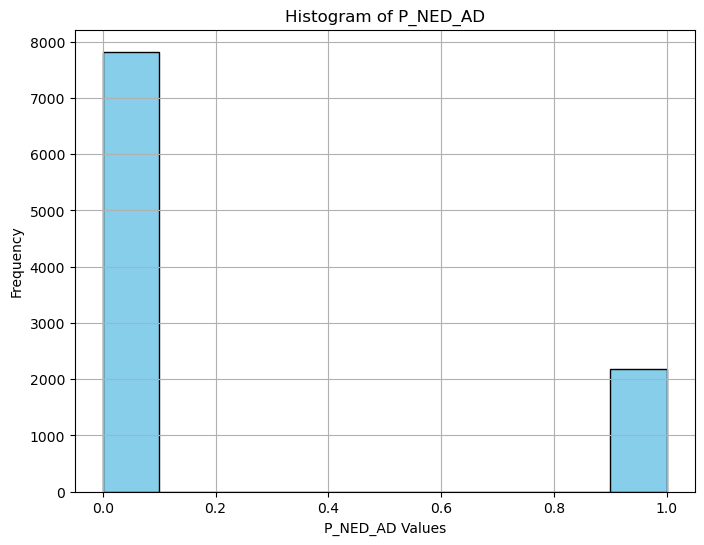

In [8]:
# Построение гистограммы
plt.figure(figsize=(8, 6))
plt.hist(df['P_NED_ADR'], bins=10, color='skyblue', edgecolor='black')  # bins - количество бинов
plt.title('Histogram of P_NED_AD')
plt.xlabel('P_NED_AD Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Training with fine-tuning via itertools

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score

# Load dataset
df = pd.read_excel('data_10k.xlsx')

# Extract features and target
X = df.drop(columns=['P_NED_ADR'])
y = df['P_NED_ADR']

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(1/3), random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

import itertools

# Define hyperparameters to try
hidden_layer_sizes = [(50,), (100,), (50, 50)]
activations = ['relu', 'tanh']
solvers = ['adam', 'sgd']
alphas = [0.0001, 0.001]

# Prepare to store results
results = []

# Iterate over all combinations of hyperparameters
for hidden_layers, activation, solver, alpha in itertools.product(hidden_layer_sizes, activations, solvers, alphas):
    # Create the MLPClassifier with current hyperparameters
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, activation=activation, solver=solver, alpha=alpha, random_state=42, max_iter=300)
    
    # Train the model
    mlp.fit(X_train_scaled, y_train)
    
    # Evaluate the model on the validation set
    y_val_pred = mlp.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    
    # Evaluate the model on the test set
    y_test_pred = mlp.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    
    # Store the results
    results.append({
        'hidden_layers': hidden_layers,
        'activation': activation,
        'solver': solver,
        'alpha': alpha,
        'val_accuracy': val_accuracy,
        'val_precision': val_precision,
        'test_accuracy': test_accuracy,
        'test_precision': test_precision
    })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)


D:\Users\ivan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Users\ivan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Users\ivan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Users\ivan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Users\ivan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

   hidden_layers activation solver   alpha  val_accuracy  val_precision  \
0          (50,)       relu   adam  0.0001        0.7925       0.575163   
1          (50,)       relu   adam  0.0010        0.7920       0.572368   
2          (50,)       relu    sgd  0.0001        0.7900       0.600000   
3          (50,)       relu    sgd  0.0010        0.7900       0.600000   
4          (50,)       tanh   adam  0.0001        0.7845       0.520710   
5          (50,)       tanh   adam  0.0010        0.7845       0.520958   
6          (50,)       tanh    sgd  0.0001        0.7865       0.563218   
7          (50,)       tanh    sgd  0.0010        0.7865       0.563218   
8         (100,)       relu   adam  0.0001        0.7905       0.567376   
9         (100,)       relu   adam  0.0010        0.7915       0.574468   
10        (100,)       relu    sgd  0.0001        0.7905       0.604396   
11        (100,)       relu    sgd  0.0010        0.7905       0.604396   
12        (100,)       ta

In [ ]:
activations = ['identity', 'logistic', 'tanh', 'relu', 'softplus', 'softsign', 'selu', 'elu', 'exponential', 'swish', 'gelu', 'mish', 'sigmoid', 'hard_sigmoid', 'linear', 'leaky_relu', 'prelu', 'thresholded_relu']
solvers = ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam', 'ftrl']
alphas = [0.0001, 0.001, 0.01, 0.1]
hidden_layer_sizes = [2, 3, 4, 5, 6, 7, 8, 9, 10]
neurons_per_layer = np.arange(2, 128, 1)

## Training with fine-tuning via GA

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score
import random
from deap import base, creator, tools, algorithms
import warnings

warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_excel('data_10k.xlsx')

# Extract features and target
X = df.drop(columns=['P_NED_ADR'])
y = df['P_NED_ADR']

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(1/3), random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter space
activations = ['identity', 'logistic', 'tanh', 'relu']
solvers = ['adam', 'sgd']
alphas = [0.0001, 0.001, 0.01, 0.1]
hidden_layer_sizes = [2, 3, 4, 5, 6, 7, 8, 9, 10]
neurons_per_layer = np.arange(2, 128, 1)

# Define the individual and fitness function
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Function to create a random individual
def create_individual():
    num_layers = random.choice(hidden_layer_sizes)
    layers = tuple(random.choice(neurons_per_layer) for _ in range(num_layers))
    activation = random.choice(activations)
    solver = random.choice(solvers)
    alpha = random.choice(alphas)
    return [layers, activation, solver, alpha]

# Register the functions with DEAP
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Results list to store the results of each evaluation
results = []

# Function to evaluate an individual
def evaluate_individual(individual):
    layers, activation, solver, alpha = individual
    
    # Create and train the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=layers, activation=activation, solver=solver, alpha=alpha, max_iter=200)
    mlp.fit(X_train_scaled, y_train)
    
    y_val_pred = mlp.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    
    y_test_pred = mlp.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    
    # Store the results
    results.append({
        'layers': layers,
        'activation': activation,
        'solver': solver,
        'alpha': alpha,
        'val_accuracy': val_accuracy,
        'val_precision': val_precision,
        'test_accuracy': test_accuracy,
        'test_precision': test_precision
    })
    
    return val_accuracy,

# Register the evaluation function
toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)

def mutate_individual(individual):
    layers, activation, solver, alpha = individual
    
    # Mutate layers
    if random.random() < 0.2:
        num_layers = random.choice(hidden_layer_sizes)
        layers = tuple(random.choice(neurons_per_layer) for _ in range(num_layers))
    
    # Mutate activation function
    if random.random() < 0.2:
        activation = random.choice(activations)
    
    # Mutate solver
    if random.random() < 0.2:
        solver = random.choice(solvers)
    
    # Mutate alpha
    if random.random() < 0.2:
        alpha = random.choice(alphas)
    
    return [layers, activation, solver, alpha]

toolbox.register("mutate", mutate_individual)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the population
population = toolbox.population(n=20)

# Run the genetic algorithm
NGEN = 10
CXPB = 0.5
MUTPB = 0.2

for gen in range(NGEN):
    print(f"Generation {gen}")
    
    # Select the next generation individuals
    offspring = toolbox.select(population, len(population))
    # Clone the selected individuals
    offspring = list(map(toolbox.clone, offspring))
    
    # Apply crossover and mutation on the offspring
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            tools.cxTwoPoint(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    
    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    
    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
        print(f"Individual {ind} - Fitness: {fit}")
    
    # Replace the population with the next generation
    population[:] = offspring

# Gather all the fitnesses in one list and print the stats
fits = [ind.fitness.values[0] for ind in population]

print("Max fitness: ", max(fits))
print("Min fitness: ", min(fits))
print("Average fitness: ", sum(fits) / len(fits))

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='val_accuracy', ascending=False).reset_index(drop=True)
print(results_df.head(20))  # Display the top 20 configurations based on validation accuracy


Generation 0
Individual [(32, 8, 95, 19, 116, 5, 109, 12, 29, 127), 'identity', 'sgd', 0.001] - Fitness: (0.7845,)
Individual [(84, 99, 37, 88), 'logistic', 'adam', 0.1] - Fitness: (0.781,)
Individual [(119, 92, 118, 38), 'relu', 'sgd', 0.001] - Fitness: (0.794,)
Individual [(84, 99, 37, 88), 'logistic', 'sgd', 0.01] - Fitness: (0.781,)
Individual [(39, 106), 'relu', 'adam', 0.0001] - Fitness: (0.77,)
Individual [(33, 54, 14, 84, 127, 108, 11, 47, 70), 'relu', 'sgd', 0.1] - Fitness: (0.781,)
Individual [(108, 116, 28, 11, 90, 89, 7, 120, 55, 53), 'tanh', 'adam', 0.0001] - Fitness: (0.764,)
Individual [(108, 116, 28, 11, 90, 89, 7, 120, 55, 53), 'tanh', 'adam', 0.0001] - Fitness: (0.7555,)
Individual [(19, 117, 45, 82, 28, 50, 123), 'tanh', 'adam', 0.0001] - Fitness: (0.7605,)
Individual [(92, 115, 53, 92, 81, 126, 112, 83, 127), 'logistic', 'adam', 0.1] - Fitness: (0.781,)
Individual [(96, 119, 93, 48, 26, 68, 87, 8), 'identity', 'sgd', 0.1] - Fitness: (0.786,)
Individual [(108, 116, 2

Individual [(84, 99, 37, 88), 'relu', 'sgd', 0.001] - Fitness: (0.792,)
Individual [(119, 92, 118, 38), 'relu', 'sgd', 0.001] - Fitness: (0.795,)
Individual [(119, 92, 118, 38), 'relu', 'sgd', 0.001] - Fitness: (0.792,)
Generation 9
Individual [(84, 99, 37, 88), 'relu', 'sgd', 0.001] - Fitness: (0.7955,)
Individual [(119, 92, 118, 38), 'relu', 'sgd', 0.001] - Fitness: (0.796,)
Individual [(119, 92, 118, 38), 'relu', 'sgd', 0.001] - Fitness: (0.7895,)
Individual [(119, 92, 118, 38), 'relu', 'sgd', 0.001] - Fitness: (0.7935,)
Individual [(119, 92, 118, 38), 'relu', 'sgd', 0.001] - Fitness: (0.7865,)
Individual [(84, 99, 37, 88), 'relu', 'sgd', 0.001] - Fitness: (0.795,)
Individual [(84, 99, 37, 88), 'relu', 'sgd', 0.001] - Fitness: (0.7915,)
Individual [(119, 92, 118, 38), 'relu', 'sgd', 0.001] - Fitness: (0.7905,)
Max fitness:  0.7965
Min fitness:  0.7865
Average fitness:  0.7944
                           layers activation solver  alpha  val_accuracy  \
0              (119, 92, 118, 38

In [22]:
results_df.to_excel('resilts_MLP.xlsx', index=False)

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import random
from deap import base, creator, tools, algorithms
import warnings

warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_excel('data_10k.xlsx')

# Extract features and target
X = df.drop(columns=['P_NED_ADR'])
y = df['P_NED_ADR']

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(1/3), random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter space
activations = ['identity', 'logistic', 'tanh', 'relu']
solvers = ['adam', 'sgd']
alphas = [0.0001, 0.001, 0.01, 0.1]
hidden_layer_sizes = [2, 3, 4, 5, 6, 7, 8, 9, 10]
neurons_per_layer = np.arange(2, 128, 1)

# Define the individual and fitness function
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Function to create a random individual
def create_individual():
    num_layers = random.choice(hidden_layer_sizes)
    layers = tuple(random.choice(neurons_per_layer) for _ in range(num_layers))
    activation = random.choice(activations)
    solver = random.choice(solvers)
    alpha = random.choice(alphas)
    return [layers, activation, solver, alpha]

# Register the functions with DEAP
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Results list to store the results of each evaluation
results = []

# Function to evaluate an individual
def evaluate_individual(individual):
    layers, activation, solver, alpha = individual
    
    # Create and train the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=layers, activation=activation, solver=solver, alpha=alpha, max_iter=200)
    mlp.fit(X_train_scaled, y_train)
    
    y_val_pred = mlp.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)
    
    y_test_pred = mlp.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    
    # Store the results
    results.append({
        'layers': layers,
        'activation': activation,
        'solver': solver,
        'alpha': alpha,
        'val_accuracy': val_accuracy,
        'val_precision': val_precision,
        'val_recall': val_recall,
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall
    })
    
    return val_precision, 

# Register the evaluation function
toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)

def mutate_individual(individual):
    layers, activation, solver, alpha = individual
    
    # Mutate layers
    if random.random() < 0.2:
        num_layers = random.choice(hidden_layer_sizes)
        layers = tuple(random.choice(neurons_per_layer) for _ in range(num_layers))
    
    # Mutate activation function
    if random.random() < 0.2:
        activation = random.choice(activations)
    
    # Mutate solver
    if random.random() < 0.2:
        solver = random.choice(solvers)
    
    # Mutate alpha
    if random.random() < 0.2:
        alpha = random.choice(alphas)
    
    return [layers, activation, solver, alpha]

toolbox.register("mutate", mutate_individual)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the population
population = toolbox.population(n=20)

# Run the genetic algorithm
NGEN = 10
CXPB = 0.5
MUTPB = 0.2

for gen in range(NGEN):
    print(f"Generation {gen}")
    
    # Select the next generation individuals
    offspring = toolbox.select(population, len(population))
    # Clone the selected individuals
    offspring = list(map(toolbox.clone, offspring))
    
    # Apply crossover and mutation on the offspring
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            tools.cxTwoPoint(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    
    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    
    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
        print(f"Individual {ind} - Fitness: {fit}")
    
    # Replace the population with the next generation
    population[:] = offspring

# Gather all the fitnesses in one list and print the stats
fits = [ind.fitness.values[0] for ind in population]

print("Max fitness: ", max(fits))
print("Min fitness: ", min(fits))
print("Average fitness: ", sum(fits) / len(fits))

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='val_accuracy', ascending=False).reset_index(drop=True)
print(results_df.head(20))  # Display the top 20 configurations based on validation accuracy


Generation 0
Individual [(109, 20, 95, 43, 56), 'tanh', 'adam', 0.1] - Fitness: (0.553072625698324,)
Individual [(45, 115, 53), 'identity', 'sgd', 0.001] - Fitness: (0.581081081081081,)
Individual [(62, 82, 87, 54), 'tanh', 'sgd', 0.1] - Fitness: (0.6057692307692307,)
Individual [(109, 20, 95, 43, 56), 'logistic', 'adam', 0.1] - Fitness: (0.0,)
Individual [(22, 55, 124, 82, 121, 79, 41), 'tanh', 'sgd', 0.001] - Fitness: (0.6355140186915887,)
Individual [(80, 124, 3, 43, 60, 10, 64, 106, 29), 'logistic', 'adam', 0.001] - Fitness: (0.0,)
Individual [(105, 88, 42, 20, 35), 'identity', 'sgd', 0.001] - Fitness: (0.5616438356164384,)
Individual [(45, 115, 53), 'identity', 'sgd', 0.001] - Fitness: (0.5694444444444444,)
Individual [(108, 93, 51, 34, 74, 2, 86, 117), 'relu', 'adam', 0.001] - Fitness: (0.0,)
Individual [(85, 45, 9, 16, 8, 110, 112, 123, 70), 'logistic', 'sgd', 0.1] - Fitness: (0.0,)
Individual [(45, 115, 53), 'identity', 'sgd', 0.001] - Fitness: (0.582089552238806,)
Individual [

Individual [(62, 82, 87, 54), 'tanh', 'sgd', 0.1] - Fitness: (0.6160714285714286,)
Individual [(62, 82, 87, 54), 'tanh', 'sgd', 0.1] - Fitness: (0.5982142857142857,)
Individual [(62, 82, 87, 54), 'tanh', 'sgd', 0.1] - Fitness: (0.6388888888888888,)
Individual [(62, 82, 87, 54), 'tanh', 'sgd', 0.1] - Fitness: (0.6534653465346535,)
Individual [(62, 82, 87, 54), 'tanh', 'sgd', 0.1] - Fitness: (0.5943396226415094,)
Individual [(62, 82, 87, 54), 'tanh', 'sgd', 0.1] - Fitness: (0.5754716981132075,)
Individual [(62, 82, 87, 54), 'tanh', 'sgd', 0.1] - Fitness: (0.61,)
Individual [(62, 82, 87, 54), 'tanh', 'sgd', 0.001] - Fitness: (0.6422018348623854,)
Individual [(62, 82, 87, 54), 'tanh', 'sgd', 0.1] - Fitness: (0.5980392156862745,)
Individual [(62, 82, 87, 54), 'tanh', 'sgd', 0.1] - Fitness: (0.6146788990825688,)
Generation 9
Individual [(62, 82, 87, 54), 'tanh', 'sgd', 0.1] - Fitness: (0.6090909090909091,)
Individual [(62, 82, 87, 54), 'tanh', 'sgd', 0.1] - Fitness: (0.6019417475728155,)
Ind

In [26]:
results_df.to_excel('resilts_MLP_recall.xlsx', index=False)